# 1. 데이터 수집

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# 필요 라이브러리 세팅 
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error
from numpy import ndarray
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import itertools
from sklearn.model_selection import train_test_split

In [60]:
plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정

In [61]:
# 해양 데이터 업로드
data_2002 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2002_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2003 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2003_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2004 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2004_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2005 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2005_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2006 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2006_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2007 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2007_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2008 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2008_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2009 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2009_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2010 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2010_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2011 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2011_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2012 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2012_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2013 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2013_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2014 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2014_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2015 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2015_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2016 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2016_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2017 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2017_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2018 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2018_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2019 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2019_profile_chemical_unknown.csv", encoding = "euc-kr")
data_2020 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/해양환경측정망_2020_profile_chemical_unknown.csv", encoding = "euc-kr")

In [62]:
# 지점별 전처리된 데이터(해역, 갯녹음 비율)
position = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/position.csv")

# 2. 데이터 전처리

In [63]:
# 전처리 함수
def preprc(df) :
    
    colnames = []
    for i in range(len(df)) :
        if df["//1.사업메타"].iloc[i] == "project_name": return1 = i
    
    df = df.iloc[return1:]
    df.reset_index(drop = True, inplace = True)
    
    for name in df.iloc[0] :
        
        colnames.append(name)
      
    df = df.iloc[1:]
    df.columns = colnames
    
    ## 타입 변환
    df = df.astype({'규산염[μg/L]' : "float", '부유물질 농도[μg/L]' : "float", '수소이온농도[무단위]' : "float", '수온[℃]' : "float", "Longitude [degrees_east]" : "float", '아질산성질소[μg/L]' : "float", '암모니아성 질소[μg/L]' : "float", '염분[psu]' : "float", '용존무기질소[μg/L]' : "float",  '용존산소[mg/L]' : "float", '인산염인[μg/L]' : "float", '질산성질소[μg/L]' : "float", '총인[μg/L]' : "float", "Latitude [degrees_north]" : "float", '총질소[μg/L]' : "float", '클로로필-a[μg/L]' : "float", '투명도[m]' : "float", '화학적산소요구량[mg/L]' : "float", "yyyy-mm-dd hh:mm:ss" : "datetime64"})    
    
    ## 표층 데이터만 추출
    if int(df["yyyy-mm-dd hh:mm:ss"].dt.year.unique()) <= 2016:
        df.drop(df.loc[df['수심(text)']=='저층'].index, inplace=True)
        df = df.reset_index(drop = True)
    elif int(df["yyyy-mm-dd hh:mm:ss"].dt.year.unique()) <= 2019:
        df.drop(df.loc[df['수심(m)']!='0'].index, inplace=True)
        df = df.reset_index(drop = True)
    else:
        df.drop(df.loc[df['수심(m)']=='저층'].index, inplace=True)
        df = df.reset_index(drop = True)
    
    return df

In [64]:
# 전처리 시작
data_2002 = preprc(data_2002)
data_2003 = preprc(data_2003)
data_2004 = preprc(data_2004)
data_2005 = preprc(data_2005)
data_2006 = preprc(data_2006)
data_2007 = preprc(data_2007)
data_2008 = preprc(data_2008)
data_2009 = preprc(data_2009)
data_2010 = preprc(data_2010)
data_2011 = preprc(data_2011)
data_2012 = preprc(data_2012)
data_2013 = preprc(data_2013)
data_2014 = preprc(data_2014)
data_2015 = preprc(data_2015)
data_2016 = preprc(data_2016)
data_2017 = preprc(data_2017)
data_2018 = preprc(data_2018)
data_2019 = preprc(data_2019)
data_2020 = preprc(data_2020)

In [65]:
# 공통 컬럼 확인
common_columns = set(data_2002.columns) & set(data_2003.columns) & set(data_2004.columns) & set(data_2005.columns) & set(data_2006.columns) & set(data_2007.columns) & set(data_2008.columns) & set(data_2009.columns) & set(data_2010.columns) & set(data_2011.columns) & set(data_2012.columns) & set(data_2013.columns) & set(data_2014.columns) & set(data_2015.columns) & set(data_2016.columns) & set(data_2017.columns) & set(data_2018.columns) & set(data_2019.columns) & set(data_2020.columns)
common_columns

{'Latitude [degrees_north]',
 'Longitude [degrees_east]',
 'amn_qc',
 'bot.depth[m]',
 'cheoxydem_qc',
 'chla_qc',
 'disinon_qc',
 'disoxy_qc',
 'hydioncon_qc',
 'natnit_qc',
 'nitnit_qc',
 'po4p_qc',
 'project_name',
 'reasil_qc',
 'sal_qc',
 'station',
 'sussed_qc',
 'tn_qc',
 'totp_qc',
 'tr_qc',
 'wtrtmp_qc',
 'yyyy-mm-dd hh:mm:ss',
 '규산염[μg/L]',
 '부유물질 농도[μg/L]',
 '수소이온농도[무단위]',
 '수심(m)',
 '수심(text)',
 '수온[℃]',
 '아질산성질소[μg/L]',
 '암모니아성 질소[μg/L]',
 '염분[psu]',
 '용존무기질소[μg/L]',
 '용존산소[mg/L]',
 '인산염인[μg/L]',
 '질산성질소[μg/L]',
 '총인[μg/L]',
 '총질소[μg/L]',
 '클로로필-a[μg/L]',
 '투명도[m]',
 '화학적산소요구량[mg/L]'}

In [66]:
# 뽑아낼 컬럼 지정(한글명 변수 위주로 해양 데이터만)
common_columns = ['station', 'yyyy-mm-dd hh:mm:ss', '규산염[μg/L]', '부유물질 농도[μg/L]','수소이온농도[무단위]', '수온[℃]', '아질산성질소[μg/L]', '암모니아성 질소[μg/L]', '염분[psu]', '용존무기질소[μg/L]', '용존산소[mg/L]', '인산염인[μg/L]', '질산성질소[μg/L]', '총인[μg/L]', '총질소[μg/L]', '클로로필-a[μg/L]', '투명도[m]', '화학적산소요구량[mg/L]']
len(common_columns) # 18개

18

In [67]:
# 연도별 데이터에 필요한 컬럼 적용 후 형태 확인
data_2002 = data_2002[common_columns]
data_2003 = data_2003[common_columns]
data_2004 = data_2004[common_columns]
data_2005 = data_2005[common_columns]
data_2006 = data_2006[common_columns]
data_2007 = data_2007[common_columns]
data_2008 = data_2008[common_columns]
data_2009 = data_2009[common_columns]
data_2010 = data_2010[common_columns]
data_2011 = data_2011[common_columns]
data_2012 = data_2012[common_columns]
data_2013 = data_2013[common_columns]
data_2014 = data_2014[common_columns]
data_2015 = data_2015[common_columns]
data_2016 = data_2016[common_columns]
data_2017 = data_2017[common_columns]
data_2018 = data_2018[common_columns]
data_2019 = data_2019[common_columns]
data_2020 = data_2020[common_columns]


print(data_2002.shape)
print(data_2003.shape)
print(data_2004.shape)
print(data_2005.shape)
print(data_2006.shape)
print(data_2007.shape)
print(data_2008.shape)
print(data_2009.shape)
print(data_2010.shape)
print(data_2011.shape)
print(data_2012.shape)
print(data_2013.shape)
print(data_2014.shape)
print(data_2015.shape)
print(data_2016.shape)
print(data_2017.shape)
print(data_2018.shape)
print(data_2019.shape)
print(data_2020.shape)

(1056, 18)
(1056, 18)
(1178, 18)
(1167, 18)
(1164, 18)
(1183, 18)
(1115, 18)
(1252, 18)
(1193, 18)
(1281, 18)
(1200, 18)
(1441, 18)
(1562, 18)
(1567, 18)
(1552, 18)
(1568, 18)
(1600, 18)
(1600, 18)
(1615, 18)


In [68]:
# 연도별 데이터의 열별 결측치 확인
print('2002년 데이터', data_2002.isnull().sum(), '\n')
print('2003년 데이터', data_2003.isnull().sum(), '\n')
print('2004년 데이터', data_2004.isnull().sum(), '\n')
print('2005년 데이터', data_2005.isnull().sum(), '\n')
print('2006년 데이터', data_2006.isnull().sum(), '\n')
print('2007년 데이터', data_2007.isnull().sum(), '\n')
print('2008년 데이터', data_2008.isnull().sum(), '\n')
print('2009년 데이터', data_2009.isnull().sum(), '\n')
print('2010년 데이터', data_2010.isnull().sum(), '\n')
print('2011년 데이터', data_2011.isnull().sum(), '\n')
print('2012년 데이터', data_2012.isnull().sum(), '\n')
print('2013년 데이터', data_2013.isnull().sum(), '\n')
print('2014년 데이터', data_2014.isnull().sum(), '\n')
print('2015년 데이터', data_2015.isnull().sum(), '\n')
print('2016년 데이터', data_2016.isnull().sum(), '\n')
print('2017년 데이터', data_2017.isnull().sum(), '\n')
print('2018년 데이터', data_2018.isnull().sum(), '\n')
print('2019년 데이터', data_2019.isnull().sum(), '\n')
print('2020년 데이터', data_2020.isnull().sum(), '\n')

2002년 데이터 station                   0
yyyy-mm-dd hh:mm:ss       0
규산염[μg/L]              1056
부유물질 농도[μg/L]             0
수소이온농도[무단위]               0
수온[℃]                     0
아질산성질소[μg/L]              0
암모니아성 질소[μg/L]            0
염분[psu]                   0
용존무기질소[μg/L]              0
용존산소[mg/L]                0
인산염인[μg/L]                0
질산성질소[μg/L]               0
총인[μg/L]                  0
총질소[μg/L]                 0
클로로필-a[μg/L]              0
투명도[m]                   11
화학적산소요구량[mg/L]            0
dtype: int64 

2003년 데이터 station                   0
yyyy-mm-dd hh:mm:ss       0
규산염[μg/L]              1056
부유물질 농도[μg/L]             0
수소이온농도[무단위]               1
수온[℃]                     0
아질산성질소[μg/L]              0
암모니아성 질소[μg/L]            0
염분[psu]                   0
용존무기질소[μg/L]              0
용존산소[mg/L]                0
인산염인[μg/L]                0
질산성질소[μg/L]               0
총인[μg/L]                  0
총질소[μg/L]                 0
클로로필-a[μg/L]              0
투명도[m]       

In [69]:
# 데이터 프레임 합치기
data_raw = pd.concat([data_2002, data_2003, data_2004, data_2005, data_2006, data_2007, data_2008, data_2009, data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019, data_2020])
data_raw.reset_index(drop = True, inplace = True)
saved_raw = data_raw.copy()

In [70]:
data_raw.info() #25350개 행, 18개 열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25350 entries, 0 to 25349
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   station              25350 non-null  object        
 1   yyyy-mm-dd hh:mm:ss  25350 non-null  datetime64[ns]
 2   규산염[μg/L]            23238 non-null  float64       
 3   부유물질 농도[μg/L]        25350 non-null  float64       
 4   수소이온농도[무단위]          25349 non-null  float64       
 5   수온[℃]                25350 non-null  float64       
 6   아질산성질소[μg/L]         25350 non-null  float64       
 7   암모니아성 질소[μg/L]       25350 non-null  float64       
 8   염분[psu]              25350 non-null  float64       
 9   용존무기질소[μg/L]         25350 non-null  float64       
 10  용존산소[mg/L]           25348 non-null  float64       
 11  인산염인[μg/L]           25350 non-null  float64       
 12  질산성질소[μg/L]          25350 non-null  float64       
 13  총인[μg/L]             25350 non-

In [71]:
# 시계열 예측을 위해 일정 건수 이상의 데이터를 가진 지역 살펴보기
df_count = data_raw.groupby(['station']).count()
df_count
#df_count[df_count['수심(text)'] >= 76] --> 결측치 없을 시, 76건이 max

,yyyy-mm-dd hh:mm:ss,규산염[μg/L],부유물질 농도[μg/L],수소이온농도[무단위],수온[℃],아질산성질소[μg/L],암모니아성 질소[μg/L],염분[psu],용존무기질소[μg/L],용존산소[mg/L],인산염인[μg/L],질산성질소[μg/L],총인[μg/L],총질소[μg/L],클로로필-a[μg/L],투명도[m],화학적산소요구량[mg/L]
station,,,,,,,,,,,,,,,,,
가로림연안1_연안,76,68,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
가로림연안2_연안,76,68,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
가로림연안3_연안,76,68,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
가로림연안4_연안,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
가로림연안5_연안,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
행암만3_환경관리,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
행암만4_환경관리,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
후포연안1_연안,76,68,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76


In [72]:
# 위에 해당하는 지점의 리스트 만들기
lst = []

for i in range(466):
    if df_count.iloc[i][0] == 76:
        lst.append(df_count.iloc[i].name)
        
print(lst, '\n')
print(len(lst),"개 지역", sep="")

['가로림연안1_연안', '가로림연안2_연안', '가로림연안3_연안', '가막만1_환경관리', '가막만2_환경관리', '가막만3_환경관리', '감포연안1_연안', '감포연안2_연안', '강구연안1_연안', '강릉연안1_연안', '강릉연안2_연안', '강릉연안3_연안', '강릉연안4_연안', '강릉연안5_연안', '거제도남안1_연안', '거제도남안2_연안', '거제도남안3_연안', '거제도남안4_연안', '거제도동안1_연안', '거제도동안2_연안', '거제도동안3_연안', '거제도동안4_연안', '거진연안2_연안', '고성자란만1_연안', '고성자란만2_연안', '고성자란만3_연안', '고창연안1_연안', '고창연안2_연안', '고창연안4_연안', '고흥연안1_연안', '고흥연안2_연안', '고흥연안3_연안', '고흥연안4_연안', '고흥연안5_연안', '광양만1_환경관리', '광양만2_환경관리', '광양만3_환경관리', '광양만4_환경관리', '광양만5_환경관리', '구룡포연안1_연안', '구룡포연안2_연안', '군산연안10_연안', '군산연안1_연안', '군산연안2_연안', '군산연안3_연안', '군산연안4_연안', '군산연안5_연안', '군산연안6_연안', '군산연안7_연안', '군산연안8_연안', '군산연안9_연안', '기장연안1_연안', '기장연안2_연안', '기장연안3_연안', '남해도남안1_연안', '남해도남안2_연안', '남해도남안3_연안', '남해도남안4_연안', '남해도남안5_연안', '대산연안1_연안', '대산연안2_연안', '대산연안3_연안', '대산연안4_연안', '대정연안1_연안', '대정연안3_연안', '도암만1_환경관리', '도암만2_환경관리', '동해연안1_연안', '동해연안2_연안', '동해연안3_연안', '동해연안4_연안', '득량만1_환경관리', '득량만2_환경관리', '득량만3_환경관리', '마산만1_환경관리', '마산만2_환경관리', '목포연안1_연안', '목포연안2_연안', '목포연안3_연안', '목포연안4_연안', '무

In [73]:
# 위 지점별로 해역, 갯녹음 비율을 매칭한 csv 파일 로드(최상단에서 진행완료)
position #position = pd.read_csv("C:/Users/손호진/Desktop/bluecarbon/position.csv")

,station,해역,getnok
0,가로림연안1_연안,1,4.90000
1,가로림연안2_연안,1,4.90000
2,가로림연안3_연안,1,4.90000
3,가막만1_환경관리,2,15.10000
4,가막만2_환경관리,2,15.10000
...,...,...,...
171,함평연안1_환경관리,1,8.30000
172,함평연안2_환경관리,1,8.30000
173,해남만1_연안,2,10.30000
174,행암만1_환경관리,2,12.50000


In [74]:
# 새 지역 리스트 만들기
lst_new = position['station']
lst_new

0       가로림연안1_연안
1       가로림연안2_연안
2       가로림연안3_연안
3       가막만1_환경관리
4       가막만2_환경관리
          ...    
171    함평연안1_환경관리
172    함평연안2_환경관리
173       해남만1_연안
174     행암만1_환경관리
175      후포연안1_연안
Name: station, Length: 176, dtype: object

In [75]:
# '연도' 변수 만들기
data_raw['year'] = data_raw['yyyy-mm-dd hh:mm:ss'].dt.year
data_raw

,station,yyyy-mm-dd hh:mm:ss,규산염[μg/L],부유물질 농도[μg/L],수소이온농도[무단위],수온[℃],아질산성질소[μg/L],암모니아성 질소[μg/L],염분[psu],용존무기질소[μg/L],용존산소[mg/L],인산염인[μg/L],질산성질소[μg/L],총인[μg/L],총질소[μg/L],클로로필-a[μg/L],투명도[m],화학적산소요구량[mg/L],year
0,가로림연안1_연안,2002-02-01 00:00:00,NaN,44.80000,8.31000,4.62000,4.50226,58.74260,31.81000,221.22200,12.71360,50.04350,157.97700,97.55200,398.05700,0.76000,0.40000,0.97000,2002
1,가로림연안1_연안,2002-05-01 00:00:00,NaN,15.40000,7.92000,10.21000,4.00000,38.00000,31.37000,241.00000,9.33000,27.50000,199.00000,53.60000,276.00000,1.46000,1.50000,0.71000,2002
2,가로림연안1_연안,2002-08-01 00:00:00,NaN,33.80000,7.89000,22.36000,10.00000,21.00000,30.06000,118.00000,5.32000,14.80000,87.00000,100.50000,224.00000,2.41000,0.50000,1.59000,2002
3,가로림연안1_연안,2002-11-01 00:00:00,NaN,20.60000,8.04000,13.44000,3.00000,4.70588,31.52000,68.67600,7.72000,17.26940,60.97020,40.36850,75.00000,0.80908,1.90000,1.63000,2002
4,가로림연안2_연안,2002-02-01 00:00:00,NaN,22.20000,8.25000,4.68000,4.98800,17.99700,31.81000,176.66200,9.24240,56.27080,153.67700,110.07600,261.37300,0.73000,0.90000,0.95000,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25345,강릉남대천하구1_연안,2020-05-26 14:07:00,192.52800,24.80000,8.23000,14.86360,1.76400,11.84400,33.76960,32.97000,10.86270,3.44100,19.36200,21.79300,160.41200,5.02000,3.50000,1.87477,2020
25346,강릉남대천하구1_연안,2020-08-15 15:35:00,67.67600,9.50000,8.15000,22.02320,0.30800,2.43600,31.69190,4.78800,9.05695,0.15500,2.04400,10.23000,156.99600,1.47200,1.00000,1.48096,2020
25347,강릉남대천하구1_연안,2020-11-26 10:23:00,93.21200,6.25000,8.26000,14.58520,1.44200,9.56200,32.42200,32.70400,8.10875,2.38700,21.70000,14.84900,148.44200,5.08000,5.00000,1.04449,2020
25348,삼덕항H1_항만,2020-02-19 11:42:00,224.53200,6.45000,8.23000,11.44950,3.55600,14.32200,34.14980,77.67200,9.78195,12.15200,59.79400,29.17100,185.26200,2.16000,5.00000,2.10648,2020


In [76]:
# 전체 데이터의 결측치 확인
data_raw.isnull().sum()

station                   0
yyyy-mm-dd hh:mm:ss       0
규산염[μg/L]              2112
부유물질 농도[μg/L]             0
수소이온농도[무단위]               1
수온[℃]                     0
아질산성질소[μg/L]              0
암모니아성 질소[μg/L]            0
염분[psu]                   0
용존무기질소[μg/L]              0
용존산소[mg/L]                2
인산염인[μg/L]                0
질산성질소[μg/L]               0
총인[μg/L]                  0
총질소[μg/L]                 0
클로로필-a[μg/L]             12
투명도[m]                   96
화학적산소요구량[mg/L]            0
year                      0
dtype: int64

In [77]:
# 결측치가 매우 많은 '규산염' 컬럼 제거 후 새 데이터 프레임에 넣기
data_raw2 = data_raw.drop(columns=['규산염[μg/L]'])

In [78]:
# '해역'정보가 추가된 지역별 데이터 만들기
main = []

for i in range(len(lst_new)):
    f_pose = []
    f_pose.append(int(position[position['station'] == lst_new[i]]['해역']))
    f_pose.append(data_raw2[data_raw2['station'] == lst_new[i]])

    main.append(f_pose)

In [79]:
# 지역별 결측치 파악
for i in range(len(lst_new)):
    print(i, "번째 데이터:", lst_new[i])
    print(main[i][1].isnull().sum(), '\n')

0 번째 데이터: 가로림연안1_연안
station                0
yyyy-mm-dd hh:mm:ss    0
부유물질 농도[μg/L]          0
수소이온농도[무단위]            0
수온[℃]                  0
아질산성질소[μg/L]           0
암모니아성 질소[μg/L]         0
염분[psu]                0
용존무기질소[μg/L]           0
용존산소[mg/L]             0
인산염인[μg/L]             0
질산성질소[μg/L]            0
총인[μg/L]               0
총질소[μg/L]              0
클로로필-a[μg/L]           0
투명도[m]                 0
화학적산소요구량[mg/L]         0
year                   0
dtype: int64 

1 번째 데이터: 가로림연안2_연안
station                0
yyyy-mm-dd hh:mm:ss    0
부유물질 농도[μg/L]          0
수소이온농도[무단위]            0
수온[℃]                  0
아질산성질소[μg/L]           0
암모니아성 질소[μg/L]         0
염분[psu]                0
용존무기질소[μg/L]           0
용존산소[mg/L]             0
인산염인[μg/L]             0
질산성질소[μg/L]            0
총인[μg/L]               0
총질소[μg/L]              0
클로로필-a[μg/L]           0
투명도[m]                 0
화학적산소요구량[mg/L]         0
year                   0
dtype: int64 

2 번째 데이터: 가로림연안3_연안
station   

In [80]:
# 지역별 결측치들을 각 컬럼의 평균으로 대치
for i in range(len(lst_new)):
    main[i][1] = main[i][1].fillna(main[i][1].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
# 지역별 결측치 재파악
for i in range(len(lst_new)):
    print(lst_new[i], i)
    print(main[i][1].isnull().sum())
    print('\n') # 더 이상 결측치 없음

가로림연안1_연안 0
station                0
yyyy-mm-dd hh:mm:ss    0
부유물질 농도[μg/L]          0
수소이온농도[무단위]            0
수온[℃]                  0
아질산성질소[μg/L]           0
암모니아성 질소[μg/L]         0
염분[psu]                0
용존무기질소[μg/L]           0
용존산소[mg/L]             0
인산염인[μg/L]             0
질산성질소[μg/L]            0
총인[μg/L]               0
총질소[μg/L]              0
클로로필-a[μg/L]           0
투명도[m]                 0
화학적산소요구량[mg/L]         0
year                   0
dtype: int64


가로림연안2_연안 1
station                0
yyyy-mm-dd hh:mm:ss    0
부유물질 농도[μg/L]          0
수소이온농도[무단위]            0
수온[℃]                  0
아질산성질소[μg/L]           0
암모니아성 질소[μg/L]         0
염분[psu]                0
용존무기질소[μg/L]           0
용존산소[mg/L]             0
인산염인[μg/L]             0
질산성질소[μg/L]            0
총인[μg/L]               0
총질소[μg/L]              0
클로로필-a[μg/L]           0
투명도[m]                 0
화학적산소요구량[mg/L]         0
year                   0
dtype: int64


가로림연안3_연안 2
station                0
yyyy-mm-d

In [82]:
# New DS 만들기(갯녹음 비율 예측을 위해 연도별 컬럼들의 평균내기(분기합 / 4))

ds = []

for i in range(len(lst_new)):
    if main[i][0] == 1: #서해(2020)
        ds.append(main[i][1][main[i][1]['year'] == 2020].mean())
    if main[i][0] == 2: #남해(2020)
        ds.append(main[i][1][main[i][1]['year'] == 2019].mean())
    if main[i][0] == 3: #동해(2020)
        ds.append(main[i][1][main[i][1]['year'] == 2019].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns bef

In [83]:
# 개수 확인(176건 확인)
len(ds)

176

In [84]:
# 완성된 ds 확인
ds

[부유물질 농도[μg/L]      21.20000
 수소이온농도[무단위]         8.04250
 수온[℃]              13.88097
 아질산성질소[μg/L]        8.43850
 암모니아성 질소[μg/L]     14.85050
 염분[psu]            31.12832
 용존무기질소[μg/L]      142.81400
 용존산소[mg/L]          8.75937
 인산염인[μg/L]         19.08825
 질산성질소[μg/L]       119.52500
 총인[μg/L]           35.57250
 총질소[μg/L]         278.16250
 클로로필-a[μg/L]        1.15167
 투명도[m]              1.57500
 화학적산소요구량[mg/L]      1.74654
 year             2020.00000
 dtype: float64, 부유물질 농도[μg/L]      21.02500
 수소이온농도[무단위]         8.03500
 수온[℃]              13.75633
 아질산성질소[μg/L]        8.58900
 암모니아성 질소[μg/L]     10.65050
 염분[psu]            31.17120
 용존무기질소[μg/L]      140.01050
 용존산소[mg/L]          8.74130
 인산염인[μg/L]         18.93325
 질산성질소[μg/L]       120.77100
 총인[μg/L]           37.73475
 총질소[μg/L]         271.27800
 클로로필-a[μg/L]        1.04675
 투명도[m]              1.50000
 화학적산소요구량[mg/L]      1.49108
 year             2020.00000
 dtype: float64, 부유물질 농도[μg/L]      32.62082
 수소이온농도[무단위

In [85]:
# 새 데이터 셋에 해역 및 갯녹음 비율 변수 추가
ds2 = pd.DataFrame(ds)
ds2['station'] = lst_new
ds2['해역'] = position['해역']
ds2['getnok'] = position['getnok']
ds2

,부유물질 농도[μg/L],수소이온농도[무단위],수온[℃],아질산성질소[μg/L],암모니아성 질소[μg/L],염분[psu],용존무기질소[μg/L],용존산소[mg/L],인산염인[μg/L],질산성질소[μg/L],총인[μg/L],총질소[μg/L],클로로필-a[μg/L],투명도[m],화학적산소요구량[mg/L],year,station,해역,getnok
0,21.20000,8.04250,13.88097,8.43850,14.85050,31.12832,142.81400,8.75937,19.08825,119.52500,35.57250,278.16250,1.15167,1.57500,1.74654,2020.00000,가로림연안1_연안,1,4.90000
1,21.02500,8.03500,13.75633,8.58900,10.65050,31.17120,140.01050,8.74130,18.93325,120.77100,37.73475,271.27800,1.04675,1.50000,1.49108,2020.00000,가로림연안2_연안,1,4.90000
2,32.62082,8.01500,13.51015,6.47850,5.02600,31.27755,131.75750,8.73030,16.69350,120.25300,36.58775,270.47300,1.54575,3.00000,1.74393,2020.00000,가로림연안3_연안,1,4.90000
3,15.37500,8.20250,16.77750,4.07500,26.45000,32.39250,53.72500,8.72500,11.52500,23.20000,27.85000,222.85000,2.03000,3.42500,1.34750,2019.00000,가막만1_환경관리,2,15.10000
4,12.02500,8.23500,16.59750,0.75000,11.67500,32.50250,15.82500,8.97750,2.37500,3.40000,19.25000,156.60000,2.43250,3.12500,1.34000,2019.00000,가막만2_환경관리,2,15.10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,53.50000,7.95000,16.90720,11.29800,11.37150,30.54405,152.26050,9.97744,20.72350,129.59100,55.39700,347.64450,1.68256,0.52500,2.05450,2020.00000,함평연안1_환경관리,1,8.30000
172,40.52500,7.95750,17.00858,5.70500,7.27300,30.63605,100.13850,9.42403,14.17475,87.16050,51.08800,327.75050,1.19265,0.65000,2.05815,2020.00000,함평연안2_환경관리,1,8.30000
173,6.45000,8.29250,16.39250,3.00000,4.95000,30.85500,28.50000,10.30750,1.40000,20.60000,12.70000,198.95000,3.70250,2.52500,2.08000,2019.00000,해남만1_연안,2,10.30000
174,14.35000,8.31500,18.07500,1.60000,29.40000,32.33000,40.47500,9.34500,3.72500,9.45000,28.35000,211.77500,5.35000,2.92500,1.98500,2019.00000,행암만1_환경관리,2,12.50000


In [86]:
# 컬럼 확인
ds2.columns

Index(['부유물질 농도[μg/L]', '수소이온농도[무단위]', '수온[℃]', '아질산성질소[μg/L]',
       '암모니아성 질소[μg/L]', '염분[psu]', '용존무기질소[μg/L]', '용존산소[mg/L]', '인산염인[μg/L]',
       '질산성질소[μg/L]', '총인[μg/L]', '총질소[μg/L]', '클로로필-a[μg/L]', '투명도[m]',
       '화학적산소요구량[mg/L]', 'year', 'station', '해역', 'getnok'],
      dtype='object')

In [87]:
#14개 feature + 해역까지: 15개!
# 물리적 원인
## 수온상승 -> 수온
## 담수 유입 -> 염분
## 개발 -> 부유물질농도, 투명도

# 화학적 원인
## 염도 변화 -> 염분
## 영양상태 -> 클로로필 + 질소 군(아질산성질소, 암모니아성 질소, 용존무기질소, 질산성질소, 총질소) + 인 군(인산염인, 총인) 등의 영양염류
## 오염물질 -> 용존산소, 화학적산소요구량

# 해역까지 추가

# 수소이온농도은 제외

In [88]:
# 갯녹음 비율이 '0'인 지역 제외(0일 수는 없으므로)
df = ds2[ds2['getnok'] > 0]
df2 = df.copy()
len(df2)

161

In [89]:
df2.index = df2['station']
df2.drop(columns=['station', 'year', '수소이온농도[무단위]'], inplace=True)
df2

,부유물질 농도[μg/L],수온[℃],아질산성질소[μg/L],암모니아성 질소[μg/L],염분[psu],용존무기질소[μg/L],용존산소[mg/L],인산염인[μg/L],질산성질소[μg/L],총인[μg/L],총질소[μg/L],클로로필-a[μg/L],투명도[m],화학적산소요구량[mg/L],해역,getnok
station,,,,,,,,,,,,,,,,
가로림연안1_연안,21.20000,13.88097,8.43850,14.85050,31.12832,142.81400,8.75937,19.08825,119.52500,35.57250,278.16250,1.15167,1.57500,1.74654,1,4.90000
가로림연안2_연안,21.02500,13.75633,8.58900,10.65050,31.17120,140.01050,8.74130,18.93325,120.77100,37.73475,271.27800,1.04675,1.50000,1.49108,1,4.90000
가로림연안3_연안,32.62082,13.51015,6.47850,5.02600,31.27755,131.75750,8.73030,16.69350,120.25300,36.58775,270.47300,1.54575,3.00000,1.74393,1,4.90000
가막만1_환경관리,15.37500,16.77750,4.07500,26.45000,32.39250,53.72500,8.72500,11.52500,23.20000,27.85000,222.85000,2.03000,3.42500,1.34750,2,15.10000
가막만2_환경관리,12.02500,16.59750,0.75000,11.67500,32.50250,15.82500,8.97750,2.37500,3.40000,19.25000,156.60000,2.43250,3.12500,1.34000,2,15.10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
함평연안1_환경관리,53.50000,16.90720,11.29800,11.37150,30.54405,152.26050,9.97744,20.72350,129.59100,55.39700,347.64450,1.68256,0.52500,2.05450,1,8.30000
함평연안2_환경관리,40.52500,17.00858,5.70500,7.27300,30.63605,100.13850,9.42403,14.17475,87.16050,51.08800,327.75050,1.19265,0.65000,2.05815,1,8.30000
해남만1_연안,6.45000,16.39250,3.00000,4.95000,30.85500,28.50000,10.30750,1.40000,20.60000,12.70000,198.95000,3.70250,2.52500,2.08000,2,10.30000


In [90]:
# 상관관계 확인
round(df2.corr()['getnok'].abs().sort_values(ascending=False), 3)

getnok           1.00000
해역               0.85300
투명도[m]           0.71000
화학적산소요구량[mg/L]   0.55400
염분[psu]          0.50700
클로로필-a[μg/L]     0.45700
총인[μg/L]         0.43700
수온[℃]            0.38600
인산염인[μg/L]       0.34800
총질소[μg/L]        0.31200
아질산성질소[μg/L]     0.30500
용존산소[mg/L]       0.29900
암모니아성 질소[μg/L]   0.24900
용존무기질소[μg/L]     0.24300
부유물질 농도[μg/L]    0.23000
질산성질소[μg/L]      0.22900
Name: getnok, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

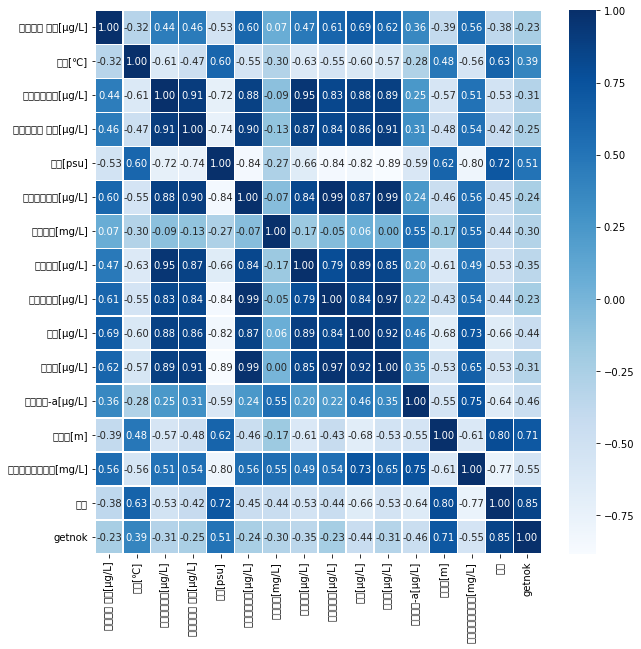

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df2.corr(method= 'pearson'), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [92]:
# 자릿수 표현(지수식 사용 X)
pd.options.display.float_format = '{:.5f}'.format

In [93]:
# 대상 컬럼들 확인
col0 = ['해역', '투명도[m]', '화학적산소요구량[mg/L]', '염분[psu]',  '클로로필-a[μg/L]', '총인[μg/L]', '수온[℃]', '총질소[μg/L]', '용존산소[mg/L]']

In [94]:
# 독립변수들로 구성된 데이터 프레임 만들기
data_features = df2[col0]
data_features

,해역,투명도[m],화학적산소요구량[mg/L],염분[psu],클로로필-a[μg/L],총인[μg/L],수온[℃],총질소[μg/L],용존산소[mg/L]
station,,,,,,,,,
가로림연안1_연안,1,1.57500,1.74654,31.12832,1.15167,35.57250,13.88097,278.16250,8.75937
가로림연안2_연안,1,1.50000,1.49108,31.17120,1.04675,37.73475,13.75633,271.27800,8.74130
가로림연안3_연안,1,3.00000,1.74393,31.27755,1.54575,36.58775,13.51015,270.47300,8.73030
가막만1_환경관리,2,3.42500,1.34750,32.39250,2.03000,27.85000,16.77750,222.85000,8.72500
가막만2_환경관리,2,3.12500,1.34000,32.50250,2.43250,19.25000,16.59750,156.60000,8.97750
...,...,...,...,...,...,...,...,...,...
함평연안1_환경관리,1,0.52500,2.05450,30.54405,1.68256,55.39700,16.90720,347.64450,9.97744
함평연안2_환경관리,1,0.65000,2.05815,30.63605,1.19265,51.08800,17.00858,327.75050,9.42403
해남만1_연안,2,2.52500,2.08000,30.85500,3.70250,12.70000,16.39250,198.95000,10.30750


In [95]:
# 목표변수 설정
target = df2['getnok']
target

station
가로림연안1_연안     4.90000
가로림연안2_연안     4.90000
가로림연안3_연안     4.90000
가막만1_환경관리    15.10000
가막만2_환경관리    15.10000
               ...   
함평연안1_환경관리    8.30000
함평연안2_환경관리    8.30000
해남만1_연안      10.30000
행암만1_환경관리    12.50000
후포연안1_연안     50.70000
Name: getnok, Length: 161, dtype: float64

In [96]:
col1 = ['해역', '투명도', '화학적산소요구량', '염분', '클로로필-a',  '총인', '수온', '총질소', '용존산소']

In [97]:
# 이상치 보정을 위한 RobustScaling 작업
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust = scaler.fit_transform(data_features)

df_robust_x = pd.DataFrame(df_robust, columns = col1)

In [98]:
df_robust_x

,해역,투명도,화학적산소요구량,염분,클로로필-a,총인,수온,총질소,용존산소
0,-0.50000,-0.43689,0.54040,-0.64912,-0.35533,0.91273,-1.80250,0.84946,0.13420
1,-0.50000,-0.45146,0.25070,-0.63300,-0.40852,1.05760,-1.87980,0.79262,0.10706
2,-0.50000,-0.16019,0.53743,-0.59302,-0.15553,0.98075,-2.03247,0.78598,0.09054
3,0.00000,-0.07767,0.08788,-0.17387,0.08999,0.39531,-0.00620,0.39279,0.08259
4,0.00000,-0.13592,0.07938,-0.13252,0.29407,-0.18090,-0.11783,-0.15419,0.46174
...,...,...,...,...,...,...,...,...,...
156,-0.50000,-0.64078,0.88962,-0.86877,-0.08616,2.24101,0.07423,1.42312,1.96326
157,-0.50000,-0.61650,0.89376,-0.83418,-0.33455,1.95229,0.13710,1.25887,1.13225
158,0.00000,-0.25243,0.91854,-0.75187,0.93797,-0.61977,-0.24496,0.19547,2.45887
159,0.00000,-0.17476,0.81081,-0.19737,1.77327,0.42881,0.79845,0.30135,1.01358


# 3. 데이터 분석

## 3-1. 갯녹음 비율 예측 모델 만들기

### (XGB 모델 만들기)

In [99]:
# 갯녹음 비율 예측을 위하여 train, test data set 분리
# Xgb, Rf 준비작업
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV

from sklearn import ensemble
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_robust_x, target, test_size = 0.1, random_state=3)

In [100]:
param = {
    'max_depth':[2, 4, 6],
    'n_estimators':[100, 300, 500],
    'gamma':[0, 1, 2]
}
xgb_getnok_predictor = xgb.XGBRegressor(random_state=3)
grid_search = GridSearchCV(estimator=xgb_getnok_predictor, param_grid=param, cv=5, scoring='r2',  n_jobs=1)

grid_search.fit(X_train, y_train)

cvres1 = grid_search.cv_results_
for mean_score, params in zip(cvres1['mean_test_score'], cvres1['params']):
    print(mean_score, params)

print(grid_search.best_params_)
print("최적 param:", grid_search.best_estimator_)
print("5 CV 시 Best Score (R2):", grid_search.best_score_)

[08:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [101]:
final_reg = XGBRegressor(param=grid_search.best_estimator_, random_state=3)
final_reg.fit(X_train, y_train)

prediction1 = final_reg.predict(X_test) # 예측 값들
predictions_1 = list(prediction1)
print(predictions_1)

from sklearn.metrics import r2_score

r2_score1 = r2_score(y_test, prediction1)
print(r2_score1)

[08:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[36.779438, 52.733376, 55.38175, 8.556812, 39.557415, 51.802673, 46.69872, 9.804659, 51.214832, 5.0803638, 20.753658, 40.65577, 2.9131224, 40.3378, 7.705381, 6.318342, 13.249576]
0.9019809213126864


### (RF 모델 만들기)

In [102]:
param2 = {
    'max_depth':[6, 8, 10],
    'n_estimators':[500, 700, 900]
}
rf_getnok_predictor = RandomForestRegressor(random_state=3)
grid_search2 = GridSearchCV(estimator=rf_getnok_predictor, param_grid=param2, cv=5, scoring='r2',  n_jobs=1)

grid_search2.fit(X_train, y_train)
cvres2 = grid_search2.cv_results_
for mean_score, params in zip(cvres2['mean_test_score'], cvres2['params']):
    print(mean_score, params)
print(grid_search2.best_params_)
print("최적 param:", grid_search2.best_estimator_)
print("5 CV 시 Best Score (R2):", grid_search2.best_score_)

0.90629865609319 {'max_depth': 6, 'n_estimators': 500}
0.9071598102462748 {'max_depth': 6, 'n_estimators': 700}
0.9072249373512984 {'max_depth': 6, 'n_estimators': 900}
0.9062720099683489 {'max_depth': 8, 'n_estimators': 500}
0.9072752551791028 {'max_depth': 8, 'n_estimators': 700}
0.9072661951574377 {'max_depth': 8, 'n_estimators': 900}
0.9067649946597476 {'max_depth': 10, 'n_estimators': 500}
0.9080264592302825 {'max_depth': 10, 'n_estimators': 700}
0.9078319800521154 {'max_depth': 10, 'n_estimators': 900}
{'max_depth': 10, 'n_estimators': 700}
최적 param: RandomForestRegressor(max_depth=10, n_estimators=700, random_state=3)
5 CV 시 Best Score (R2): 0.9080264592302825


In [103]:
final_reg2 = RandomForestRegressor(max_depth=10, n_estimators=700, random_state=3)
final_reg2.fit(X_train, y_train)

prediction2 = final_reg2.predict(X_test) # 예측 값들
predictions_2 = list(prediction2)
print(predictions_2)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


r2_score2 = r2_score(y_test, prediction2)
print(r2_score2)

[28.586561904762103, 49.9758571428571, 52.98928571428574, 9.522857620981153, 41.85871428571463, 51.60642857142856, 43.411714285714176, 9.901302071890564, 49.92299999999996, 5.010107142857102, 14.729486130209667, 40.48542857142884, 7.137603896991204, 40.03485714285757, 8.314334445276055, 7.947448047810022, 12.880796705856296]
0.9579911487448385


### (다중 선형 회귀 모델 만들기)

In [104]:
final_reg3 = LinearRegression()
final_reg3.fit(X_train, y_train)

prediction3 = final_reg3.predict(X_test) # 예측 값들
predictions_3 = list(prediction3)
print(predictions_3)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score3 = r2_score(y_test, prediction3)
print(r2_score3)

[18.567796741275682, 49.70757211147369, 38.0756613234349, 20.625336590150596, 39.9262777670064, 51.74091475980397, 47.33759784505424, 24.962726669144292, 50.1226249624373, 10.461981966948017, 21.901870418403902, 48.01108257951988, 6.1696566901953265, 47.61000470113292, 6.529394489750711, 6.289437435709004, 15.669801748273635]
0.864285714443649


In [105]:
#RS
'0.9195237251975099'
'0.9579911487448385'
'0.8642857144436489'

#SS
'0.9195212356411168'
'0.9580073509166697'
'0.864285714443649'

'0.864285714443649'

# 3-2. 주요 변수들의 시계열 예측

In [106]:
# 선정된 지역 리스트
station_list = df2.index
station_list #161개 지역

Index(['가로림연안1_연안', '가로림연안2_연안', '가로림연안3_연안', '가막만1_환경관리', '가막만2_환경관리',
       '가막만3_환경관리', '감포연안1_연안', '감포연안2_연안', '강구연안1_연안', '강릉연안1_연안',
       ...
       '태안연안4_연안', '태안연안5_연안', '통영연안1_연안', '통영연안2_연안', '통영연안4_연안',
       '함평연안1_환경관리', '함평연안2_환경관리', '해남만1_연안', '행암만1_환경관리', '후포연안1_연안'],
      dtype='object', name='station', length=161)

In [107]:
# 예측 대상 변수들
col2 = col0[1:]
col2

['투명도[m]',
 '화학적산소요구량[mg/L]',
 '염분[psu]',
 '클로로필-a[μg/L]',
 '총인[μg/L]',
 '수온[℃]',
 '총질소[μg/L]',
 '용존산소[mg/L]']

In [108]:
# 지역별 데이터프레임 형성
main2 = []
for i in range(len(main)):
    if main[i][1]['station'].unique()[0] in station_list:
        main2.append(main[i][1].reset_index()[col2])
print(len(main2),"개 지역", sep="")
main2

161개 지역


[    투명도[m]  화학적산소요구량[mg/L]  염분[psu]  클로로필-a[μg/L]  총인[μg/L]    수온[℃]  \
 0  0.40000         0.97000 31.81000       0.76000  97.55200  4.62000   
 1  1.50000         0.71000 31.37000       1.46000  53.60000 10.21000   
 2  0.50000         1.59000 30.06000       2.41000 100.50000 22.36000   
 3  1.90000         1.63000 31.52000       0.80908  40.36850 13.44000   
 4  0.60000         2.06648 30.97000       1.08532  34.93330  3.71000   
 ..     ...             ...      ...           ...       ...      ...   
 71 2.50000         1.38000 31.86000       2.14000  30.90000 17.30000   
 72 1.50000         1.80096 31.75940       1.74000  39.15300  5.54840   
 73 1.50000         1.55861 31.77270       0.50333  34.31700 12.46780   
 74 1.50000         1.86368 29.86490       1.13000  39.99000 21.74450   
 75 1.80000         1.76292 31.11630       1.23333  28.83000 15.76320   
 
     총질소[μg/L]  용존산소[mg/L]  
 0   398.05700    12.71360  
 1   276.00000     9.33000  
 2   224.00000     5.32000  
 3    

In [109]:
len(main2)

161

In [110]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from fbprophet import Prophet
from sklearn.model_selection import ParameterGrid

params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_range':[0.8, 0.9], #학습 데이터의 앞부분 N%
               'changepoint_prior_scale':[0.3,0.5,0.7], #변동점을 찾는 유동성 flexibility 변경
               }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 12


In [ ]:
import random

metrics = []

#for i in range(0, 161): #전체

#for i in range(0, 40) #유림
#for i in range(40, 80) #효연
#for i in range(80, 120) #미진
for i in range(120, 161): #수현

    dp = pd.DataFrame(main2[i])
    dp['ds'] = list(pd.date_range('1900-01-01', periods=76))
    location = []
    print("[",station_list[i],"]",sep="")
    for j in range(len(col2)):
        print("-", col2[j], sep="")
        dp2 = dp[['ds', col2[j]]]
        dp2.columns = ['ds', 'y']
        
        robustScaler = RobustScaler()
        temp = np.array(dp2['y']).reshape((len(dp2['y']), 1))
        train_data_robustScaled = robustScaler.fit_transform(temp)
        train_data_robustScaled_df = pd.DataFrame(train_data_robustScaled)
        train_data_robustScaled_df['ds']= pd.to_datetime(dp2['ds'])
        train_data_robustScaled_df.columns = ['y', 'ds']

        end_date = '1900-03-13'

        mask1 = (train_data_robustScaled_df['ds'] <= end_date)
        mask2 = (train_data_robustScaled_df['ds'] > end_date)

        X_tr = train_data_robustScaled_df.loc[mask1]
        X_tst = train_data_robustScaled_df.loc[mask2]
        
        strt='1900-03-13'
        end='1900-03-17'
        model_parameters = pd.DataFrame(columns = ['RMSE','Parameters'])

        for p in grid:
            test = pd.DataFrame()
            print(p)
            random.seed(3)
            train_model = Prophet(seasonality_mode = p['seasonality_mode'],
                                 changepoint_range = p['changepoint_range'],
                                 changepoint_prior_scale = p['changepoint_prior_scale'],
                                 weekly_seasonality= False,
                                 daily_seasonality = False,
                                 yearly_seasonality = False,
                                ).add_seasonality(
                                name='quarterly',
                                period=4,
                                fourier_order=25,#25
                                prior_scale=20)
            train_model.fit(X_tr)
            train_forecast = train_model.make_future_dataframe(periods=4, freq='D',include_history = False)
            train_forecast = train_model.predict(train_forecast)
            test = train_forecast[['ds','yhat']]
            Actual = train_data_robustScaled_df[(train_data_robustScaled_df['ds']>strt) & (train_data_robustScaled_df['ds']<=end)]
            RMSE = np.sqrt(mean_squared_error(Actual['y'],abs(test['yhat'])))
            model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)

        parameters = model_parameters.sort_values(by=['RMSE'])
        parameters = parameters.reset_index(drop=True)
        best_params = parameters['Parameters'][0]
        print("<best params of ", col2[j], ">", '\n', parameters.iloc[0], sep="")
        
        final_model = Prophet(seasonality_mode = best_params['seasonality_mode'],
                                changepoint_range = best_params['changepoint_range'],
                                changepoint_prior_scale = best_params['changepoint_prior_scale'],
                                weekly_seasonality= False,
                                daily_seasonality = False,
                                yearly_seasonality = False,
                                ).add_seasonality(
                                name='quarterly',
                                period=4,
                                fourier_order=25,#25
                                prior_scale=20)
        final_model.fit(X_tr)

        future = final_model.make_future_dataframe(periods=8, freq='D')
        forecast = final_model.predict(future)
        forecast
        
        the_values = list(parameters.iloc[0][1].values())
        the_values.insert(0, parameters.iloc[0][0])
        the_values.insert(0, col2[j])
        
        temp2 = np.array(forecast['yhat'][76:]).reshape((len(forecast['yhat'][76:]), 1))
        t2_prime_prime = robustScaler.inverse_transform(temp2)
        
        the_values.append(np.mean(t2_prime_prime))
        the_values

        the_values.insert(0, station_list[i])
        print('\n')

    
    location.append(the_values)
    print('\n')
    metrics.append(location)

[인천연안2_환경관리]
-투명도[m]
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.8, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.8, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.7, 'changepoint_range': 0.8, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.7, 'changepoint_range': 0.8, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.7, 'chang

In [ ]:
metrics2 = pd.DataFrame()

for i in range(40*len(col2)):
    metrics2 = pd.concat([metrics2, pd.DataFrame(metrics[i])])
    metrics2

In [ ]:
metrics2.to_csv("/content/drive/My Drive/Colab Notebooks/project/metircs.csv", encoding = "euc-kr")

In [ ]:
# 여기까지만 남기고 나머지는 쓰지 마세요